# Задача на регуляризцию

Загрузка данных

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

data = pd.read_csv('data/non_linear.csv', sep=',')
data.head()

degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.119
Качество на обучении: 0.052


/srv/data_client/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.97791e-18): result may not be accurate.
  overwrite_a=True).T


у класса *Ridge* в конструкторе есть параметр регуляризации - обучите регрессию при $\alpha=0.01$. 

Как изменилась ошибка на обучении? Как изменилась ошибка на валидации? Удалось ли победить переобучение? Используйте степень полинома n=12

In [64]:
# -- ВАШ КОД ТУТ --


degree = 12
alpha = 0.01
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0.01).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))
print('Ошибка на обучении увеличилась, а ошибка на валидации уменьшилась. Победить переобучение удалось.')


# ------------------

Качество на валидации: 0.077
Качество на обучении: 0.058
Ошибка на обучении увеличилась, а ошибка на валидации уменьшилась. Победить переобучение удалось.


/srv/data_client/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.81104e-22): result may not be accurate.
  overwrite_a=True).T


### Домашняя работа: Lasso vs Ridge

На данных из файла `data/non_linear.csv`
* сгенерируйте данные до степени *degree = 8* включительно
* обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных
* используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей
* постройте два столбчатых графика, на которых отобразите величину коэффициентов в для Ridge регрессии и Lasso регрессии виде столбиков

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](img/coeff_example.png)

/srv/data_client/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9365323182557326, tolerance: 0.0024481555784964045
  positive)
/srv/data_client/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6197582700047914, tolerance: 0.0024481555784964045
  positive)
/srv/data_client/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3594230250602637, tolerance: 0.0024481555784964045
  positive)
/srv/data_client/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to i

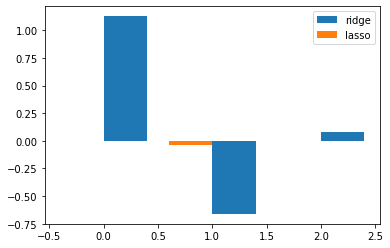

In [65]:
# -- ВАШ КОД ТУТ ---

res = {'ridge': {}, 'lasso': {}}

for deg in range(1,9):
    X = generate_degrees(data['x_train'], deg)
    y = data.y_train.values
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

    model1 = Ridge(alpha=0.8).fit(X_train, y_train)
    model2 = Lasso(alpha=0.8).fit(X_train, y_train)

    res['ridge'][deg] = model1
    res['lasso'][deg] = model2
    
import matplotlib.pyplot as plt

degree = 3

y1 = res['ridge'][degree].coef_
y2 = res['lasso'][degree].coef_
x1 = np.arange(degree) + 0.2
x2 = np.arange(degree) - 0.2
fig, ax = plt.subplots()
ax.bar(x1, y1, width = 0.4, label='ridge')
ax.bar(x2, y2, width = 0.4, label='lasso')
ax.legend()
plt.show()

# ------------------

# Домашнее задание: пишем Ridge регрессию.

Мы использовали реализацию Ridge регрессию из библиотеки sklearn. Для того, чтобы  прокачать навыки программирования и освежить в памяти, как перемножать матрицы в numpy, напишите код для вычисления коэффициентов полиномиальной регрессии (для степени *degree=8*) с регуляризацией по формуле
$$
\overline{w} = \left(X^TX + \lambda E\right)^{-1}X^T\overline{y}
$$

Для примера можно ориентироваться на то, как была реализована аналитическая формула для линейной регрессии в модуле "Линейная регрессия. Часть I"

Единичную матрицу $E$ можно получить с помощью функции https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html . Размерность матрицы $k\times k$ (по количеству коэффициентов линейной регрессии). Напоминаю, что количество коэффициентов регрессии совпадает с количеством фичей регрессии, в задании будет $k=8$, т.к. генерим признаки для полинома восьмой степени.

In [66]:
# -- ВАШ КОД ТУТ --

degree = 8
k = 8

X = generate_degrees(data['x_train'], degree)
y = data.y_train.values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

w_analytic = np.linalg.inv(X_train.T.dot(X_train) + k*np.eye(k)).dot(X_train.T).dot(y_train)
print(w_analytic)
# -----------------

[ 0.51152727  0.40716153  0.22421288 -0.04867427 -0.17822688  0.08659551
 -0.01446891  0.00083008]


# Домашнее задание: подбираем шаг градиентного спуска 

Очевидно, что чем больше шаг градиентного спуска (параметр *eta0* класса *SGDRegressor*), тем быстрее мы придём к оптимальным значениям. Используя под выше, поиграйтесь с параметром *eta0* и добейтесь , чтобы градиентный спуск закончился быстрее, чем за 200 шагов.

Сколько шагов у вас получилось? Какое качество *RMSE* у Вашего решения? Визуализируйте функцию потерь

In [67]:
# -- ВАШ КОД ТУТ --
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# для регрессии
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
%matplotlib inline
data = pd.read_csv('data/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()

X = data['x_train'].values.reshape(-1, 1) # превращаем X из простого массива в вектор-столбец
y = data['y_train'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

data.head()
# ----------------

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


Итерации остановлены на шаге 191
Минимальное количество шагов - 191, при eta0 - 0.01


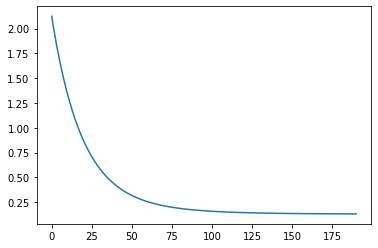

In [68]:
rand_state = 42
eta0 = 0.01

sgd_regressor = SGDRegressor(
    learning_rate='constant', 
    eta0=0.01, 
    fit_intercept=True, 
    random_state=rand_state)

#инициализация весов случайным образом
w_curr = np.random.random(2)
eps = 0.0001

#изменения весов и ошибка на валидации
weight_evolution, rmse_evolution = [], []

for step in list(range(800)):
    #шаг градиентного спуска
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    #отслеживаем изменения весов
    weight_evolution.append(
        distance.euclidean(w_curr, sgd_regressor.coef_)
    )
    #проверяем критерий остановки
    if weight_evolution[-1] < eps:
        print("Итерации остановлены на шаге %d" % step); break
    rmse_evolution.append(
        mean_squared_error(y_valid, sgd_regressor.predict(X_valid))
    )
    #Обновление классов регрессии
    w_curr = sgd_regressor.coef_.copy()
plt.plot(range(step), rmse_evolution)
print(f'Минимальное количество шагов - {step}, при eta0 - {eta0}')

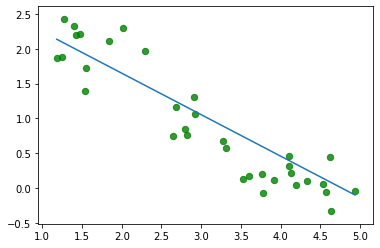

In [69]:
x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)

y_linspace= sgd_regressor.predict(x_linspace.reshape(-1,1))

plt.plot(x_linspace, y_linspace)
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')

plt.show()

# Домашнее задание: SGD на многомерных данных

Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [72]:
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# -- ВАШ КОД ТУТ --

reg = SGDRegressor(random_state=10).fit(X_train, y_train)
reg.n_iter_, r2_score(reg.predict(X_test), y_test)
print(f'Качество на валидации по метрике r2_score: {r2}. Количество итераций: {iterations}')
# -----------------

Качество на валидации по метрике r2_score: -38.44889329616655. Количество итераций: 75


# Домашняя работа: добавляем регуляризацию в SGD

В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} 1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i + 2\cdot 1\right)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i + 2x_k\right)& k\neq 0 \\
\end{array}
\right.
$$

В этом модуле мы узнали, как  обучать линейную регрессию, не "упираясь" в аппаратные ресурсы: использовать градиентный спуск.
Мы узнали, как детектировать переобучение модели и закрепили свои знания на примере полиномиальной регрессии и выяснили, как увеличить качество решения с помощью механизма регуляризации. Познакомились с двумя видами регуляризации -  Ridge и Lasso.

Загружаем исходные данные

In [19]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


Код для SGD

In [20]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gradient(X, y, w, alpha=0) -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    pointwise_errors = np.multiply(X, error) + X
    # print(pointwise_errors.shape, X.shape, error.shape)
    grad = pointwise_errors.sum(axis=0)*(-1.0)*2.0 / n
    return grad, error

def eval_w_next(X, y, eta, w_current):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    return (w_next, weight_evolution, grad)

def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w

# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008)

step 100 |w-w_next|=0.00588, grad=[-0.70619263  0.20400501]
step 200 |w-w_next|=0.00484, grad=[-0.58114414  0.16788098]
step 300 |w-w_next|=0.00398, grad=[-0.47823851  0.13815359]
step 400 |w-w_next|=0.00328, grad=[-0.39355481  0.11369016]
step 500 |w-w_next|=0.00270, grad=[-0.32386641  0.09355856]
step 600 |w-w_next|=0.00222, grad=[-0.26651803  0.07699176]
step 700 |w-w_next|=0.00183, grad=[-0.21932456  0.0633585 ]
step 800 |w-w_next|=0.00150, grad=[-0.18048784  0.05213935]
step 900 |w-w_next|=0.00124, grad=[-0.1485281   0.04290681]
step 1000 |w-w_next|=0.00102, grad=[-0.12222761  0.03530912]


# Домашнее задание: извлечение признаков из текста

Реализуем пайплайн в виде функции, при помощи которой обработаем все текстовые описания. Для каждого описания
* проводим токенизацию
* удаляем пунктуацию
* приводим к нижнему регистру
* удаляем стоп-слова


Примените процедуру токенизации к файлу brand_tweets_valid.csv

Сколько уникальных токенов получилось?

In [22]:
import nltk
import string
import pandas as pd

nltk.download('punkt', download_dir='.')
df = pd.read_csv('data/brand_tweets_valid.csv', sep=',', encoding='utf8')
df.drop(df[df.tweet_text.isnull()].index, inplace=True)
print(df.shape)

df.head()

(402, 3)


[nltk_data] Downloading package punkt to ....
[nltk_data]   Package punkt is already up-to-date!


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,Wow! Google maps for mobile v5 demo at #sxsw. ...,Other Google product or service,Positive emotion
1,The #google name was built on gettinng stuff o...,Google,Positive emotion
2,&quot;Apple opening a temporary store in Austi...,NaN,No emotion toward brand or product
3,#tech Apple Opening Pop-Up Store In Austin For...,Apple,Positive emotion
4,GSDM Google party is off the hook! #SXSW {link},Google,Positive emotion


In [40]:
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')

def tokenize_text(raw_text: str):
    """Функция для токенизации текста
    
    :param raw_text: исходная текстовая строка
    """
    filtered_tokens = []
    
    for token in nltk.word_tokenize(raw_text):
        if token not in string.punctuation:
            token_l = token.lower()
            if token_l not in stop_words:
                filtered_tokens.append(token_l)
            
    return filtered_tokens

tokenized_tweets= df.tweet_text.apply(tokenize_text)

df = df.assign(
    tokenized=tokenized_tweets
)

def chain(*iterables):
    for it in iterables:
        for element in it:
            yield element

set_tokens = set(chain(*df.tokenized.tolist()))
col_unique_tokens = len(set_tokens)
print(f'{col_unique_tokens} уникальных токенов')

1762 уникальных токенов


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Домашнее задание: поиск дубликатов в тексте

Потренируйтесь в нахождении матрицы схожести для валидационного сета

загрузите brand_tweets_valid.csv
примените объект vectorizer, обученный на датасете brand_tweets.csv (просто скопируйте этот код из урока)
примените функцию pairwise_distances к полученной матрице

In [43]:
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import CountVectorizer

# инициализируем объект, который токенизирует наш текст
# в качестве единственного аргимента передаём функцию, которую мы написали в Уроке 2
# на разбивает каждый документ на токены
vectorizer = CountVectorizer(tokenizer=tokenize_text)
# применяем наш объект-токенизатор к датафрейму с твитами
document_matrix = vectorizer.fit_transform(df.tweet_text.values)
# результат - матрица, в которой находятся числа, строк в мастрице столько, сколько документов
# а столбцов столько, сколько токенов
document_matrix



<402x1764 sparse matrix of type '<class 'numpy.int64'>'
	with 4918 stored elements in Compressed Sparse Row format>

In [47]:
import pandas as pd

df_valid = pd.read_csv('data/brand_tweets_valid.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df_valid.drop(df_valid[df_valid.tweet_text.isnull()].index, inplace=True)

valid_doc_matrix = vectorizer.fit_transform(df_valid.tweet_text.values)
tweet_distance = 1 - pairwise_distances(valid_doc_matrix, metric="cosine")
tweet_distance.shape

(402, 402)

* Пользуясь матрицей схожести, полученной на предыдущем этапе, найдите top-5 твитов, похожих на твит валидационного сета с id=14.

У вас есть матрица схожести между объектами. Попробуйте решить задачу поиска дубликатов в тексте

1. Визуализируйте гистограмму значений в матрице схожести
1. Напишите функцию на Python, которая принимает индекс твита, пороговое значение (число от $0.0$ до $1.0$ и матрицу схожести, а затем выводит все твиты, схожесть которых больше, чем пороговое значение

In [60]:
print(df_valid.iloc[14].tweet_text)

Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW


In [61]:
tweet_index = 14
num = 5
sorted_similarity = np.argsort(-tweet_distance[tweet_index,:])
for i in range(num):
    print(df.iloc[sorted_similarity[i]].tweet_text)
    print('-------------')



Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW
-------------
Apple employees just showed up in force to the #SXSW PopUp Apple Store. #iPad2
-------------
#sxsw apple store run out for the day :( boo apple.
-------------
video from the popup Apple store: {link} #sxsw #sxswi
-------------
#SXSW Apple Pop Up Store still has iPads in stock, we are waiting on line {link} via @mention #apple #ipad2‰Ыќ
-------------


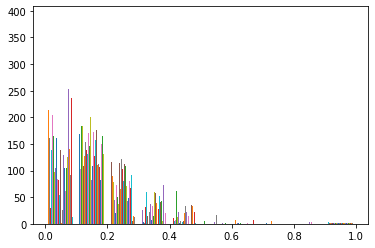

In [53]:
plt.hist(tweet_distance)
plt.show()

In [57]:
def tweets(tw_index, s, matrix):
    sorted_similaritis = np.argsort(-matrix[tw_index,:])
    
    indexes = []
    for index in sorted_similaritis:
        sim = matrix[tw_index,:][index]
        if sim < s:
            continue
            
        indexes.append((index, sim))
        
    return indexes

for i,j in tweets(source_tweet_index, 0.999, tweet_distance):
    print(df_valid.iloc[i].tweet_text)

Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW
